<a href="https://colab.research.google.com/github/hvr2026/CMPE-255-Assignment-2-LOW-CODE-ASSIGNMENTS-PART-2---pycaret-low-code-tasks/blob/main/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pycaret[full]

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached tbats-1.1.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached interpret-0.6.3-py3-none-any.whl.metadata (1.1 kB)
  Using cached ydata_profiling-4.10.0-py2.py3-none-any.whl.metadata (20 kB)
  Using cached explainerdashboard-0.4.7-py3-none-any.whl.metadata (3.8 kB)
  Using cached statsforecast-1.5.0-py3-none-any.whl.metadata (23 kB)
  Using cached mlflow-2.16.2-py3-none-any.whl.metadata (29 kB)
  Using cached gradio-4.44.0-py3-none-any.whl.metadata (15 kB)
  Using cached boto3-1.35.24-py3-none-any.whl.metadata (6.6 kB)
  Using cached evidently-0.4.37-py3-none-any.whl.metadata (11 kB)
  Using cached fugue-0.8.7-py3-none-any.whl.metadata (17 kB)
  Using cached moto-4.2.14-py2.py3-none-any.whl.metadata (12 kB)
  Using cached tune_sklearn-0.5.0-py3-none-any.whl.metadata (12 kB)
  Using cached dash_auth-2.3.0-py3-none-any.whl.metadata (10 

In [7]:
# check installed version
import pycaret
import pandas as pd
pycaret.__version__

'3.3.2'

In [11]:
#data heart_disease_simulated.csv set generated by ChatGPT
data = pd.read_csv('/content/heart_disease_simulated.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,2,126,458,1,0,144,0,2.3,2,3,1,1
1,57,0,0,158,384,0,1,133,0,6.2,0,2,1,0
2,43,0,3,111,286,0,0,130,0,2.8,1,0,2,0
3,71,1,2,189,515,1,1,149,0,2.1,1,0,2,1
4,36,0,0,142,303,0,0,107,1,3.6,1,2,1,1


In [12]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'target', session_id = 101)

,Description,Value
0,Session id,101
1,Target,target
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 14)"
5,Transformed train set shape,"(212, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [13]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [14]:
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [15]:
# init setup on exp
exp.setup(data, target = 'target', session_id = 121)

,Description,Value
0,Session id,121
1,Target,target
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 14)"
5,Transformed train set shape,"(212, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [16]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.5758,0.5730,0.5527,0.5844,0.5622,0.1525,0.1553,1.5390
lr,Logistic Regression,0.5712,0.5926,0.5691,0.5749,0.5660,0.1422,0.1462,0.8030
ridge,Ridge Classifier,0.5712,0.5936,0.5691,0.5749,0.5660,0.1422,0.1462,0.0290
lda,Linear Discriminant Analysis,0.5712,0.5945,0.5691,0.5749,0.5660,0.1422,0.1462,0.0450
nb,Naive Bayes,0.5617,0.5980,0.5582,0.5648,0.5547,0.1204,0.1231,0.0250
et,Extra Trees Classifier,0.5478,0.5424,0.5809,0.5484,0.5549,0.0966,0.1035,0.2720
dt,Decision Tree Classifier,0.5329,0.5323,0.5491,0.5106,0.5246,0.0634,0.0626,0.0270
gbc,Gradient Boosting Classifier,0.5292,0.5424,0.5073,0.5255,0.5112,0.0589,0.0598,0.1570
svm,SVM - Linear Kernel,0.5232,0.6045,0.4873,0.3705,0.4005,0.0474,0.0472,0.0250
ada,Ada Boost Classifier,0.5193,0.5374,0.5536,0.5079,0.5251,0.0364,0.0392,0.1090


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [17]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6459,0.6315,0.6191,0.6619,0.6325,0.2911,0.2973,0.1420
lightgbm,Light Gradient Boosting Machine,0.5801,0.6032,0.5800,0.5910,0.5716,0.1597,0.1645,0.1530
xgboost,Extreme Gradient Boosting,0.5753,0.6067,0.6191,0.5622,0.5833,0.1494,0.1536,0.0600
nb,Naive Bayes,0.5749,0.6117,0.5418,0.5969,0.5543,0.1513,0.1584,0.0240
catboost,CatBoost Classifier,0.5699,0.6029,0.5800,0.5696,0.5633,0.1421,0.1480,1.3000
rf,Random Forest Classifier,0.5660,0.6019,0.5209,0.5715,0.5392,0.1283,0.1302,0.2070
gbc,Gradient Boosting Classifier,0.5656,0.5898,0.5900,0.5785,0.5756,0.1315,0.1328,0.1980
ada,Ada Boost Classifier,0.5472,0.5500,0.5282,0.5394,0.5210,0.0887,0.0908,0.1820
lr,Logistic Regression,0.5370,0.5894,0.4718,0.5462,0.4943,0.0711,0.0756,0.1350
dt,Decision Tree Classifier,0.5323,0.5345,0.5618,0.5220,0.5330,0.0680,0.0720,0.0250


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=121, verbose=0,
                     warm_start=False)

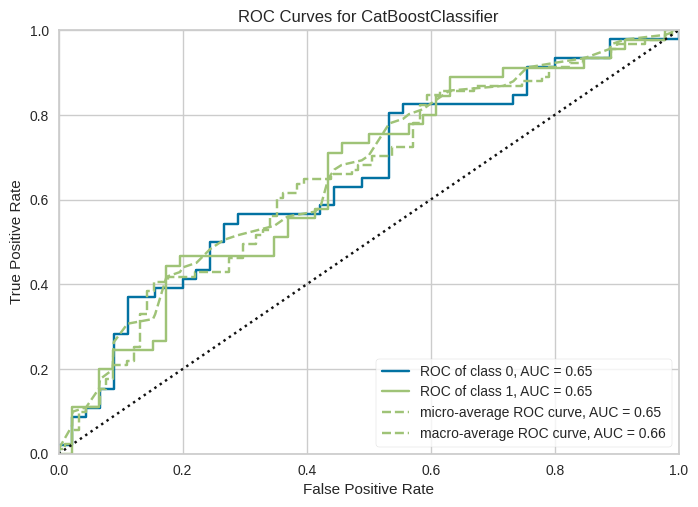

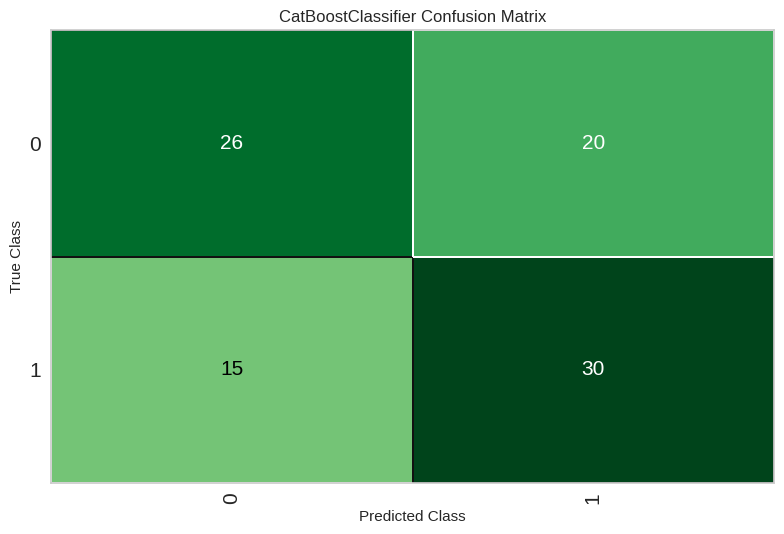

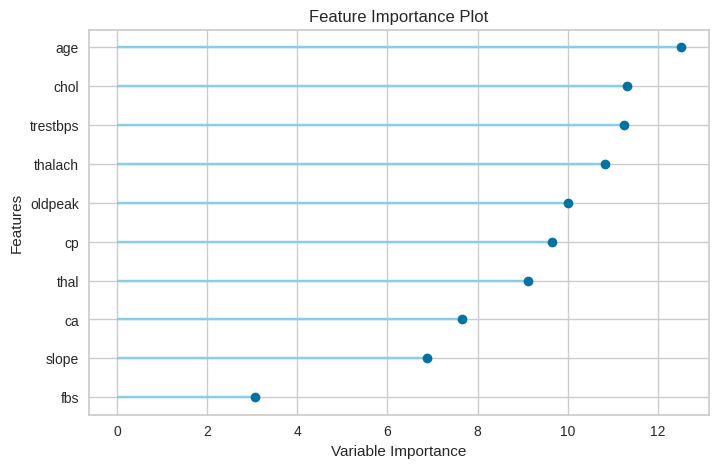

In [18]:
plot_model(best, plot='auc')              # Plot ROC AUC
plot_model(best, plot='confusion_matrix') # Confusion Matrix
plot_model(best, plot='feature')          # Feature Importance


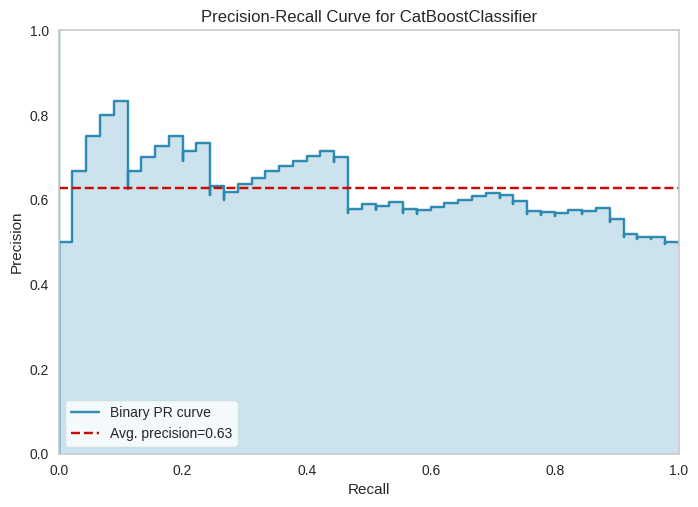

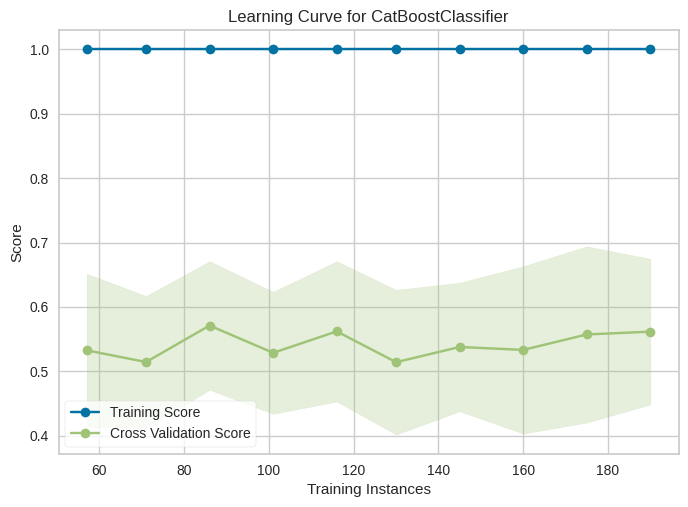

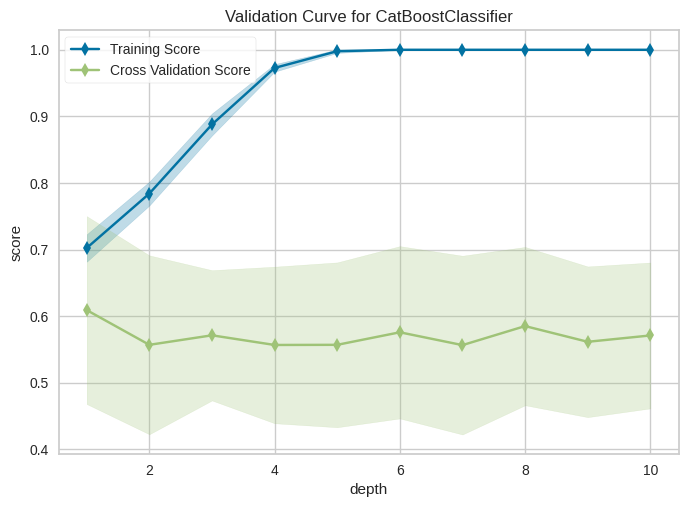

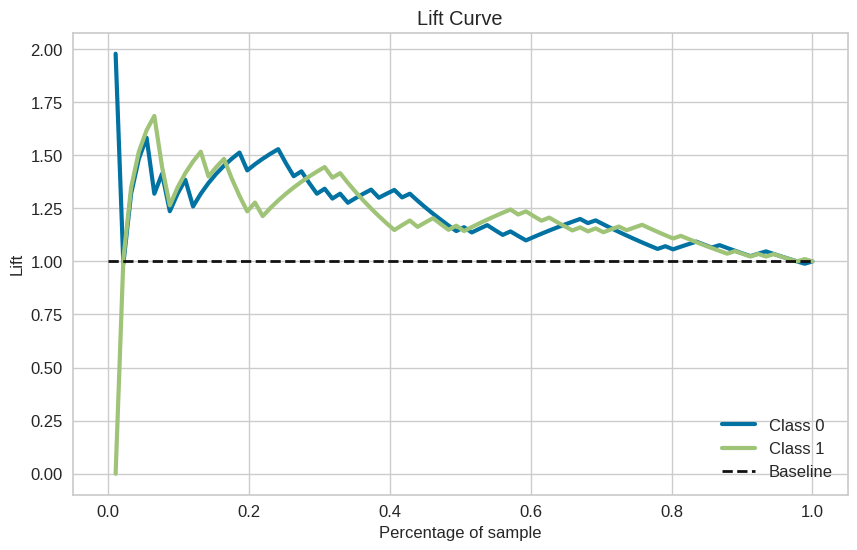

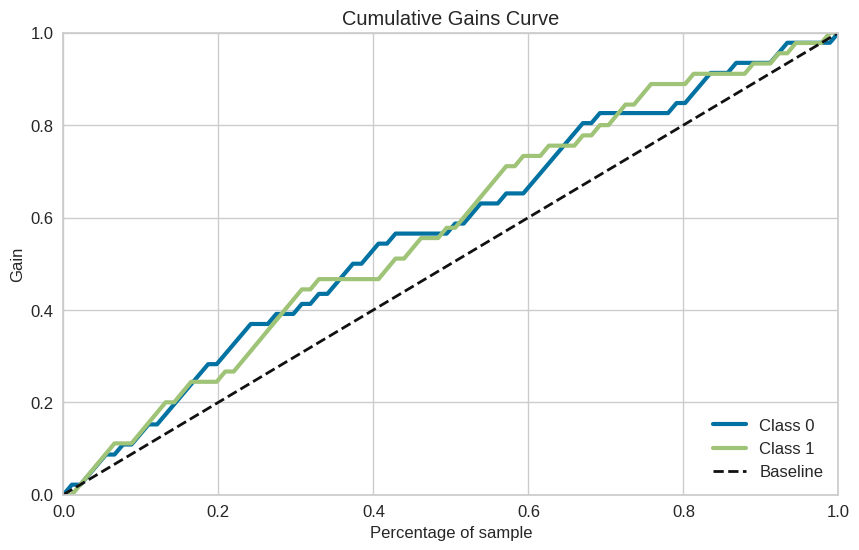

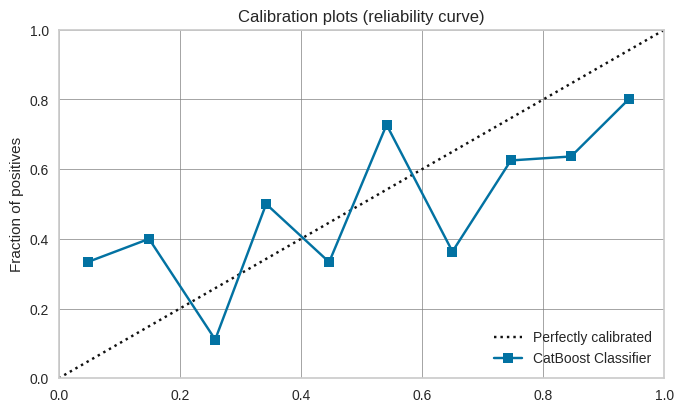

In [30]:

# Precision-Recall Curve
plot_model(best, plot='pr')



# Learning Curve
plot_model(best, plot='learning')

# Validation Curve
plot_model(best, plot='vc')

# Lift Chart
plot_model(best, plot='lift')

# Gain Chart
plot_model(best, plot='gain')

# Calibration Curve
plot_model(best, plot='calibration')

In [22]:
testset_predictions = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.6154,0.6517,0.6667,0.6000,0.6316,0.2316,0.2330


In [23]:
testset_predictions.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediction_label,prediction_score
114,35,0,3,146,248,1,1,192,1,4.1,1,0,2,0,1,0.6305
12,64,1,3,120,293,0,0,190,1,5.1,2,1,2,0,0,0.6711
25,40,1,1,162,219,0,0,74,0,0.6,1,3,2,0,1,0.6388
274,60,1,2,144,549,0,1,189,0,5.5,0,2,0,0,0,0.5184
36,31,1,1,167,543,0,1,92,0,2.4,1,1,0,1,1,0.7037


In [25]:
new_data = data.copy()
new_data.drop('target', axis=1, inplace=True)
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67,1,2,126,458,1,0,144,0,2.3,2,3,1
1,57,0,0,158,384,0,1,133,0,6.2,0,2,1
2,43,0,3,111,286,0,0,130,0,2.8,1,0,2
3,71,1,2,189,515,1,1,149,0,2.1,1,0,2
4,36,0,0,142,303,0,0,107,1,3.6,1,2,1


In [26]:
new_predictions = predict_model(best, data = new_data)
new_predictions.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,prediction_label,prediction_score
0,67,1,2,126,458,1,0,144,0,2.3,2,3,1,1,0.7704
1,57,0,0,158,384,0,1,133,0,6.2,0,2,1,0,0.6343
2,43,0,3,111,286,0,0,130,0,2.8,1,0,2,0,0.7843
3,71,1,2,189,515,1,1,149,0,2.1,1,0,2,1,0.8572
4,36,0,0,142,303,0,0,107,1,3.6,1,2,1,1,0.5752


In [27]:
save_model(best, 'pipeline_one')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'sex', 'cp', 'trestbps',
                                              'chol', 'fbs', 'restecg',
                                              'thalach', 'exang', 'oldpeak',
                                              'slope', 'ca', 'thal'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(e

In [29]:
loaded_best_pipeline = load_model('pipeline_one')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'sex', 'cp', 'trestbps',
                                             'chol', 'fbs', 'restecg',
                                             'thalach', 'exang', 'oldpeak',
                                             'slope', 'ca', 'thal'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('trained_model',
                 <catboost.core.CatBoostClassifier object at 0x7d2b22d3fb20>)],
         verbose=False)